<a href="https://colab.research.google.com/github/shivam23rawat/Home-Loan-Prediction-System/blob/master/Home_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING NECESSARY PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#READING TRAINING AND TESTING DATA



In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')

#LOOKING AT THE STRUCTURE OF THE DATA



In [ ]:
train.columns # 12 independent and 1 target variable in train dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns # Similar to training dataset but Loan_Status is missing which we will predict

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
#looking at the shape of the training dataset shows 614 rows and 13 columns in it
print('Training data shape: ', train.shape)
train.head()


Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#looking at the shape of the testing dataset shows 367 rows and 12 columns in it
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#UNIVARIATE ANALYSIS

> Simplest form of analysing data , each variable examined individually frequency table or bar plot for for categorical and probability density plot for numerical features.



##ANALYSING THE TARGET VARIABLE

In [ ]:
train["Loan_Status"].count() #returns size of the target variable

614

In [ ]:
train["Loan_Status"].value_counts() # Number of loans accepted(Y) vs rejected(N)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train["Loan_Status"].value_counts(normalize=True)*100 # Generates the number in percentages


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

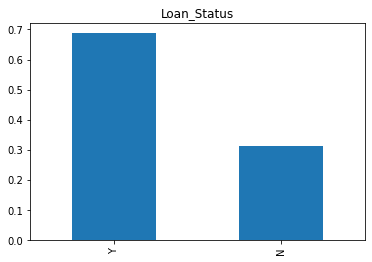

In [ ]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title='Loan_Status') #Bar plot to better represent the margin in both status

##ANALYSING INDEPENDENT CATAGORICAL VARIABLES


###ANALYSING "GENDER" VARIABLE

In [ ]:
train["Gender"].count() #size of gender variable

601

In [ ]:
train["Gender"].value_counts() #489 males and 112 females among 601 people

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train["Gender"].value_counts(normalize=True)*100 #gender wise distribution in percentages 81% males and 19% females

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

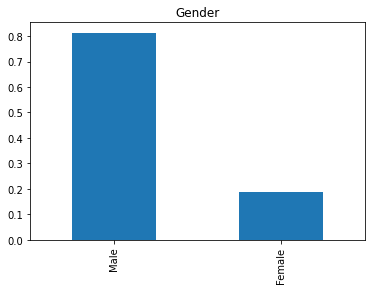

In [ ]:
train["Gender"].value_counts(normalize=True).plot.bar(title='Gender') #gender wise distribution comparison using bar charts

###ANALYSING "MARRIED" VARIABLE(MARITAL STATUS)

In [ ]:
train["Married"].count() #total number of people

611

In [ ]:
train["Married"].value_counts()  # 398 married and 213 unmarried

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
train["Married"].value_counts(normalize=True)*100  #married-unmarried ratio in percentage

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

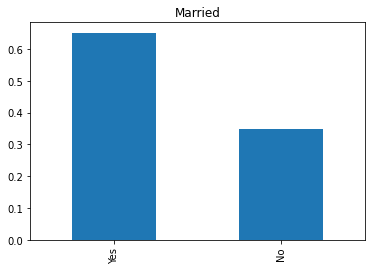

In [ ]:
train["Married"].value_counts(normalize=True).plot.bar(title='Married') #bar chart to compare number of people according to marital status


###ANALYSING "SELF_EMPLOYED" VARIABLE

In [ ]:
train["Self_Employed"].count()  #total number of people

582

In [ ]:
train["Self_Employed"].value_counts() #500 are not self employed and 82 are self employed

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train["Self_Employed"].value_counts(normalize=True)*100  #difference in percentage

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

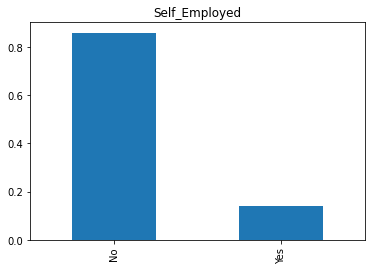

In [ ]:
train["Self_Employed"].value_counts(normalize=True).plot.bar(title='Self_Employed')

###ANALYSING "CREDIT HISTORY" VARIABLE

In [ ]:
train["Credit_History"].count()  # Total number of debts

564

In [ ]:
train["Credit_History"].value_counts() #475 repaid debts and 89 not-repaid debts

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
train["Credit_History"].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

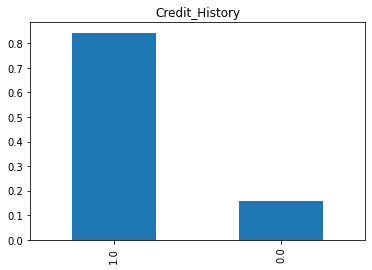

In [ ]:
train["Credit_History"].value_counts(normalize=True).plot.bar(title='Credit_History') #Credit history comparisons 1 means repaid debts 0 means not repaid

##ANALYSING INDEPENDENT ORDINAL VARIABLES

> Ordinal features have some order involved

###ANALYSING "DEPENDENTS" VARIABLE

In [ ]:
train["Dependents"].count()

599

In [ ]:
train["Dependents"].value_counts() # Number of 0,1,2 and 3+ dependent variables 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train["Dependents"].value_counts(normalize=True)*100  #in percentage

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

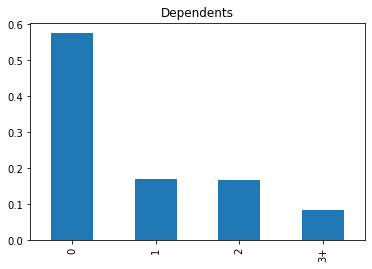

In [ ]:
train["Dependents"].value_counts(normalize=True).plot.bar(title='Dependents')

###ANALYSING "EDUCATION" VARIABLE

In [ ]:
train["Education"].count()

614

In [ ]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
train["Education"].value_counts(normalize=True)*100 #Normalizing the Education Variable Values

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

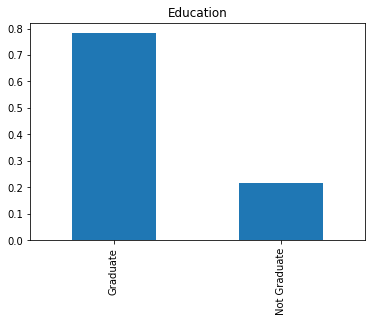

In [ ]:
train["Education"].value_counts(normalize=True).plot.bar(title="Education")

###ANALYSING "PROPERTY_AREA" VARIABLE

In [ ]:
train["Property_Area"].count() 

614

In [ ]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
train["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

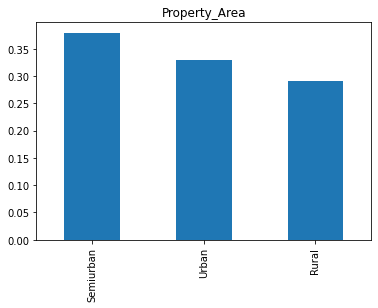

In [ ]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title='Property_Area')

##ANALYSING INDEPENDENT NUMERIC VARIABLES

###ANALYSING "APPLICANTINCOME" VARIABLE

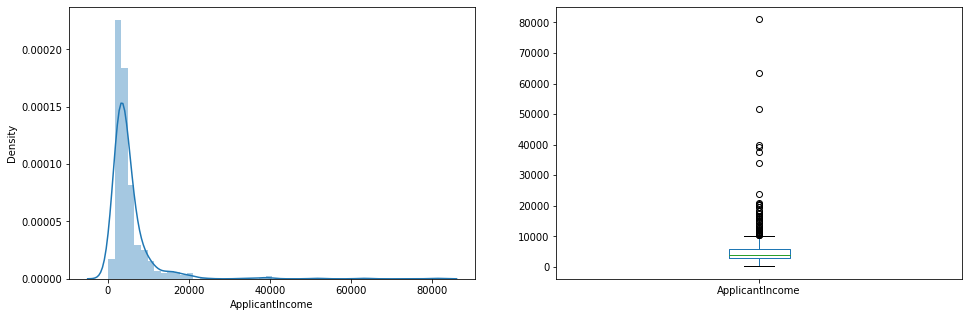

In [ ]:
plt.figure(1)  #used to create a figure object
plt.subplot(121)  #used to create a wrapper for the figure object
sns.distplot(train["ApplicantIncome"]);   #used to flexibly plot a univariate distribution of observations
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))  #plot a boxplot
plt.show()

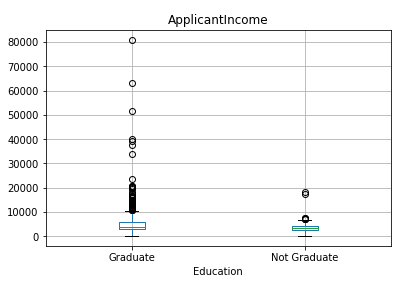

In [ ]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

###ANALYSING "COAPPLICANTINCOME" VARIABLE

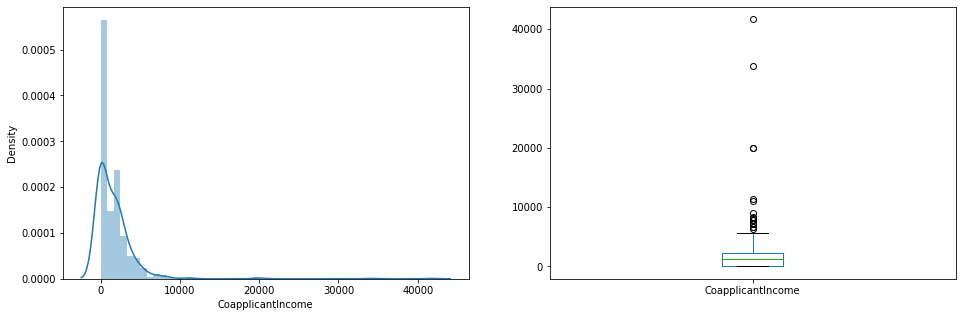

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]); #A plot representing a Histogram with the line showing the Variations.

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

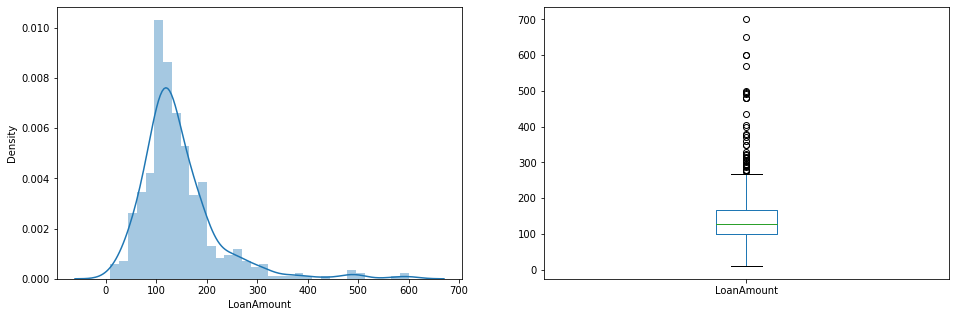

In [ ]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

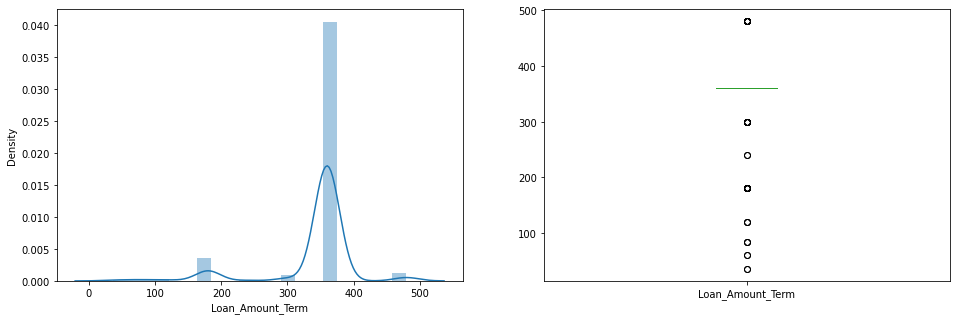

In [ ]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

##BIVARIATE ANALYSIS

####CATEGORICAL INDEPENDENT VS TARGET VARIABLE

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


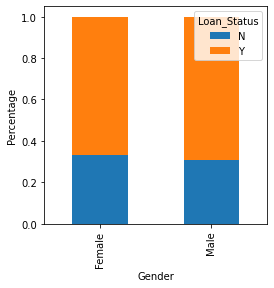

In [ ]:
print(pd.crosstab(train["Gender"],train["Loan_Status"])) #creates a table representing Gender vs Loan_status variables.
Gender = pd.crosstab(train["Gender"],train["Loan_Status"]) 
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4)) #Computing the sum of loan paid individuals from both the genders seperately.
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


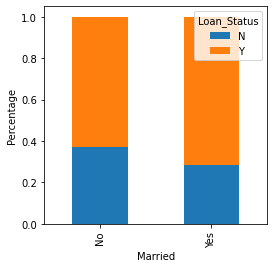

In [ ]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


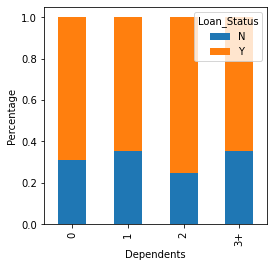

In [ ]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


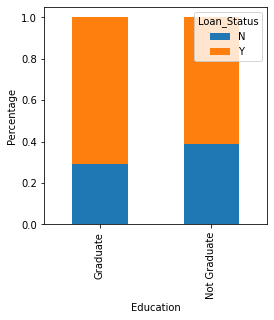

In [ ]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


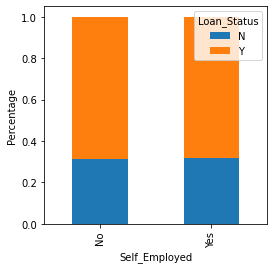

In [ ]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


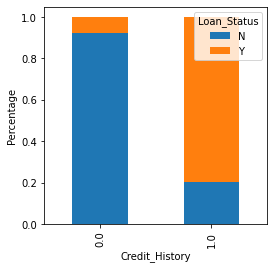

In [ ]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


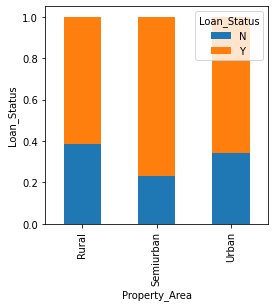

In [ ]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

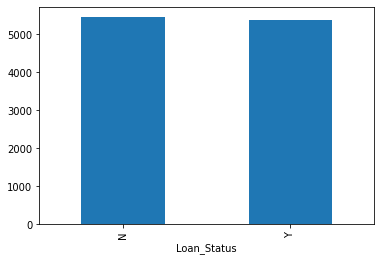

In [ ]:
#Numerical Independent Variable vs Target Variable

train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

In [ ]:

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


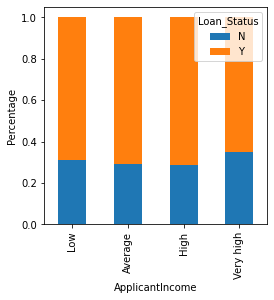

In [ ]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [ ]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


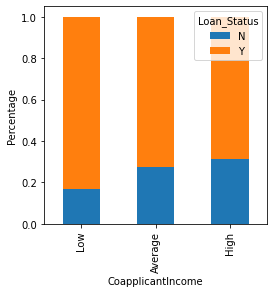

In [ ]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [ ]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [ ]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


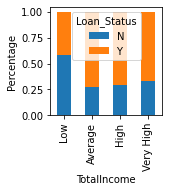

In [ ]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [ ]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


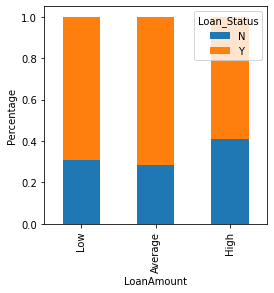

In [ ]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

In [ ]:
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [ ]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

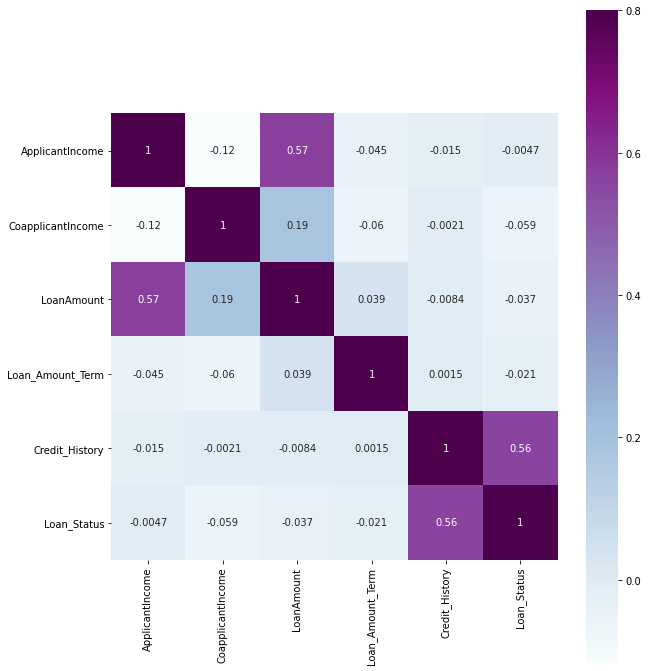

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True); #Creating a heatmap, Showing correlation between various attributes: Credit History-loan amount is showing the Highest Correlation.

imputing missing values and treating outliers to enhance model performance

In [ ]:
#feature-wise count of missing values.
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Since there are very few values we can fill them using the mode of the features
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [ ]:
train["Loan_Amount_Term"].value_counts()


360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64



---


TRAIN DATASET ALL MISSING VALUES FILLED ^^

---



In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [ ]:
test.isnull().sum() #All columns with 0 na values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

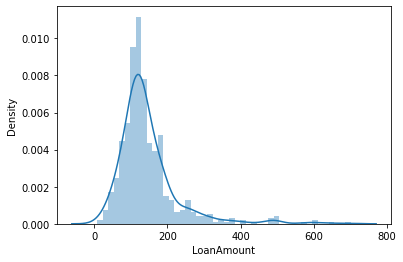

In [ ]:
sns.distplot(train["LoanAmount"]);

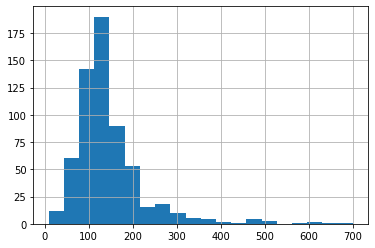

In [ ]:
train['LoanAmount'].hist(bins=20)

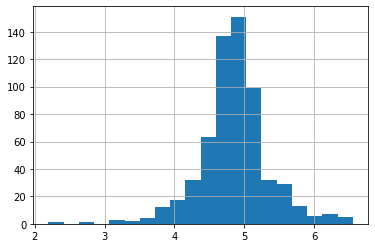

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) #Calculating Natural Log for loan_amount values as a part of normalization.
train['LoanAmount_log'].hist(bins=20)

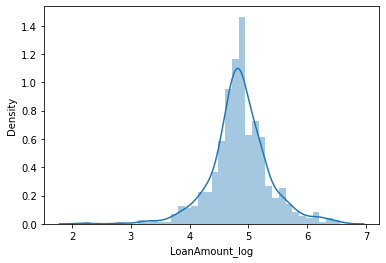

In [ ]:
sns.distplot(train["LoanAmount_log"])

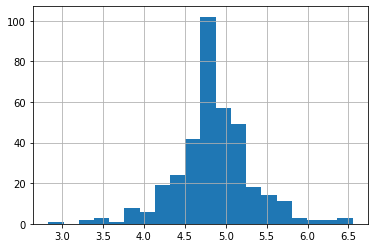

In [ ]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

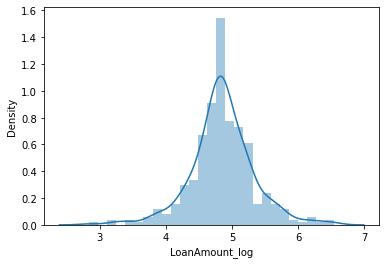

In [ ]:
sns.distplot(test["LoanAmount_log"])

In [ ]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [ ]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [ ]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [ ]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


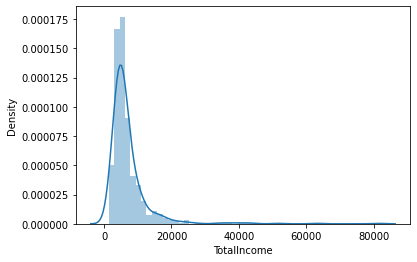

In [ ]:
sns.distplot(train["TotalIncome"]) #A histogram with a line showing variations between Density and TotalIncome.

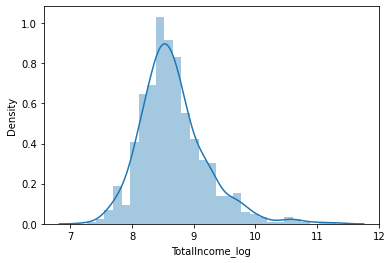

In [ ]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

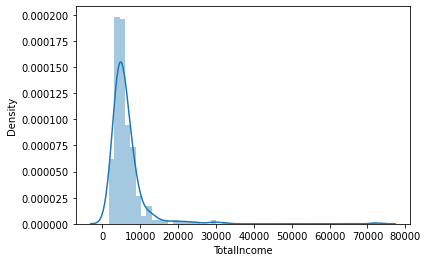

In [ ]:
sns.distplot(test["TotalIncome"])

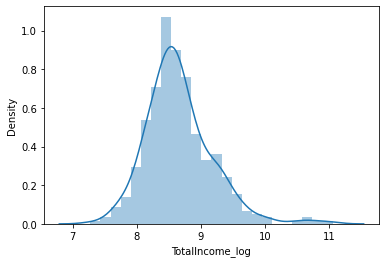

In [ ]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

In [ ]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [ ]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [ ]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


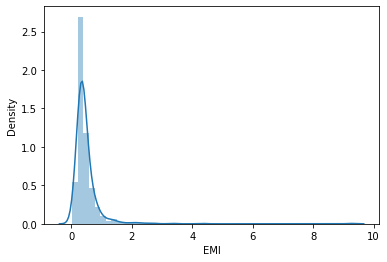

In [ ]:
sns.distplot(train["EMI"])

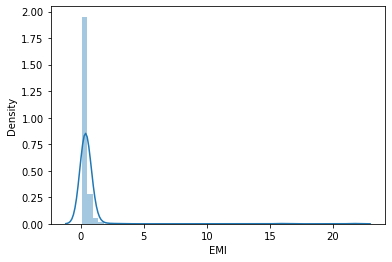

In [ ]:
sns.distplot(test["EMI"])

In [ ]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [ ]:
train[["Balance_Income"]].head() #Showing 5 representative records.

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [ ]:
test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


In [ ]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1) #

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [ ]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1) 

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


#MODEL BUILDING 

In [ ]:
train=train.drop("Loan_ID",axis=1) #dropping unused variables
test=test.drop("Loan_ID",axis=1)

In [ ]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667


In [ ]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222


In [ ]:
X=train.drop("Loan_Status",1)

In [ ]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


In [ ]:
train.shape

(614, 13)

In [ ]:
y=train[["Loan_Status"]]
y.head(2)

,Loan_Status
0,1
1,0


In [ ]:
X = pd.get_dummies(X)
X.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)
train.head(3)
test.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5720,8.674026,0.305556,5719.694444,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,4576,8.714568,0.350000,4575.650000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,1.0,4.189655,6800,8.006368,0.577778,6799.422222,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)

In [ ]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_cv_logistic=logistic_model.predict(x_cv)

##CALCULATING ACCURACY OF THE PREDICTION THROUGH LOGISTIC REGRESSION

In [ ]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
score_logistic

75.67567567567568

In [ ]:
pred_test_logistic = logistic_model.predict(test)

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [ ]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
pred_cv_forest=forest_model.predict(x_cv)

##CALCULATING ACCURACY OF THE PREDICTION THROUGH RANDOM FOREST


In [ ]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
score_forest

77.83783783783784

In [ ]:
pred_test_forest=forest_model.predict(test)

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=1)

In [ ]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
pred_cv_tree=tree_model.predict(x_cv)

In [ ]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

##CALCULATING ACCURACY OF THE PREDICTION THROUGH DECISION TREES

In [ ]:
score_tree #Final Test accuracy of the Model in perecentage.

71.35135135135135

In [ ]:
pred_test_tree = tree_model.predict(test)

#FINDING IMPORTANCE OF DIFFERENT FEATURES


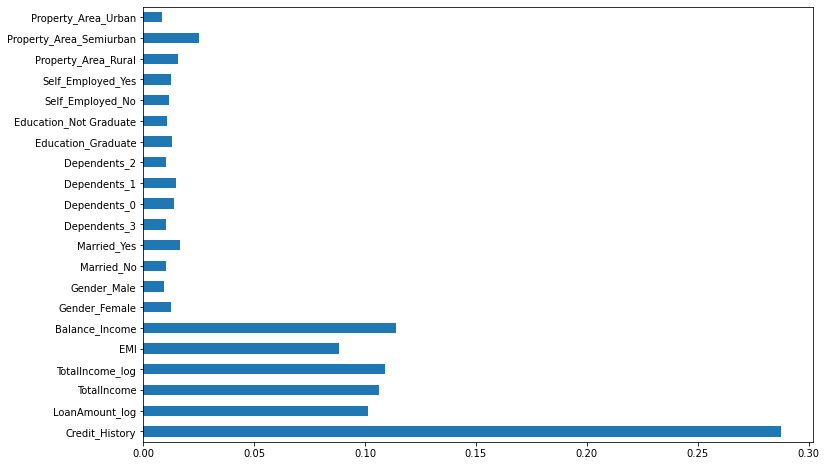

In [ ]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8)) #Credit History plays a major role in believing the customers, according to the graph shown.